In [76]:
#Este analisis verifica si la cercanía a hospitales y centros de salud privados afecta el precio.

import pandas as pd
import numpy as np
#import shapely
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [77]:
#Datos de establecimientos de salud

#Hospitales. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/areas-hospitalarias
publicos = pd.read_csv('hospitalesPublicos.csv', sep = ";",low_memory = False) 

#Centros de salud privados. Datos extraídos de: https://data.buenosaires.gob.ar/dataset/centros-de-salud-privados
privados = pd.read_csv('hospitalesPrivados.csv', sep = ";",low_memory = False) 

In [78]:
#Cargamos los datos que ya tenemos procesados

#Datos procesados
data = pd.read_csv('dataFiltrada/datosCapital.csv',low_memory = False)


#Tomo los datos que me interesan: estado, barrio, superficie, precio por m2, latitud y longitud)
filteredData = data[['barrio','price','lat', 'lon']]

#Elimino NAs
filteredData.dropna(inplace=True)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [79]:
#Nos quedamos con los campos que consideramos utiles para vincular con las propiedades
privado2 = privados[['NOMBRE','LAT','LNG']]
#Cambio las comas en latitud y longitud por puntos para poder usarlos como float
privado2['lat'] = privado2['LAT'].str.replace(',','.').astype(float)
privado2['lon'] = privado2['LNG'].str.replace(',','.').astype(float)

privados = privado2[['NOMBRE','lat','lon']]
privado.sample(5)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,NOMBRE,lat,lon
57,CLINICA GERIATRICA GUAYAQUIL,-34.619504,-58.430525
1,CAMI - MEDICINA DEL TRABAJO,-34.612884,-58.420476
48,DIAGNOSTICO MEDICO,-34.596846,-58.397237
55,INSTITUTO MEDICO DE OBSTETRICIA,-34.607061,-58.398908
25,HOSPITAL MILITAR CENTRAL,-34.570141,-58.436162


In [80]:
#Buscamos, para cada propiedad, el centro de salud más cercano
precio_segun_distancia = filteredData.copy()

#Definimos una funcion que calcula la distancia entre dos puntos
import math
def dist(lat1,lon1,lat2,lon2):
    dLat = math.radians(lat2-lat1)
    dLon = math.radians(lon2-lon1)

    lat1 = math.radians(lat1)
    lat2 = math.radians(lat2)

    a = math.sin(dLat/2) * math.sin(dLat/2) + math.sin(dLon/2) * math.sin(dLon/2) * math.cos(lat1) * math.cos(lat2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return c * 6371 * 1000

In [81]:
#Encuentra el hospital o centro de salud privado más cercano a las coordenadas dadas
def encontrar_mas_cercano(lat, lon, fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return fuente.loc[distancias.idxmin(), 'NOMBRE']

#Calcula la distancia mínima a un hospital o centro de salud
def dist2(lat,lon,fuente):
    distancias = fuente.apply(lambda row: dist(lat, lon, row['lat'], row['lon']), axis=1)
    return distancias.min()

In [82]:
#Direcciones extraídas de Google Maps para los hospitales
aux = hospital[['NOMBRE', 'WKT']]
aux['lat'] = 0.

aux.at[0, 'lat'] = -34.617369
aux.at[1, 'lat'] = -34.599915
aux.at[2, 'lat'] = -34.609531
aux.at[3, 'lat'] = -34.623738
aux.at[4, 'lat'] = -34.625355
aux.at[5, 'lat'] = -34.648925
aux.at[6, 'lat'] = -34.586471
aux.at[7, 'lat'] = -34.581443
aux.at[8, 'lat'] = -34.564832
aux.at[9, 'lat'] = -34.644780
aux.at[10, 'lat'] = -34.643191
aux.at[11, 'lat'] = -34.628252

aux['lon'] = 0.

aux.at[0, 'lon'] = -58.410183
aux.at[1, 'lon'] = -58.510748
aux.at[2, 'lon'] = -58.438305
aux.at[3, 'lon'] = -58.469683
aux.at[4, 'lon'] = -58.507623
aux.at[5, 'lon'] = -58.515292
aux.at[6, 'lon'] = -58.471636
aux.at[7, 'lon'] = -58.406978
aux.at[8, 'lon'] = -58.470934
aux.at[9, 'lon'] = -58.454385
aux.at[10, 'lon'] = -58.410067
aux.at[11, 'lon'] = -58.365549

h_publicos = aux[['NOMBRE', 'lat', 'lon']]
h_publicos.head(12)

/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/santiago/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,NOMBRE,lat,lon
0,HTAL. DR. J.M. RAMOS MEJIA,-34.617369,-58.410183
1,HTAL. DR. A. ZUBIZARRETA,-34.599915,-58.510748
2,HTAL. DR. C.G. DURAND,-34.609531,-58.438305
3,HTAL. DR. T. ALVAREZ,-34.623738,-58.469683
4,HTAL. VELEZ SARSFIELD,-34.625355,-58.507623
5,HTAL. DR. F. SANTOJANI,-34.648925,-58.515292
6,"HTAL. DR, E. TORNU",-34.586471,-58.471636
7,HTAL. J.A.FERNANDEZ,-34.581443,-58.406978
8,HTAL. DR. PIROVANO,-34.564832,-58.470934
9,HTAL. DR. P. PIÑERO,-34.644780,-58.454385


In [83]:
#Agrego columnas al dataframe con el hospital privado y centro privado más cercanos
#y las distancias mínimas a los mismos
precio_segun_distancia['privado_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], privados), axis=1)
precio_segun_distancia['distancia_minima_privado (m)'] = precio_segun_distancia.apply(lambda row: dist2(row['lat'],row['lon'],privados), axis=1)

precio_segun_distancia['publico_mas_cercano'] = precio_segun_distancia.apply(lambda row: encontrar_mas_cercano(row['lat'], row['lon'], h_publicos), axis=1)
precio_segun_distancia['distancia_minima_publico (m)'] = precio_segun_distancia.apply(lambda row: dist2(row['lat'],row['lon'], h_publicos), axis=1)

In [84]:
len(precio_segun_distancia)

70482

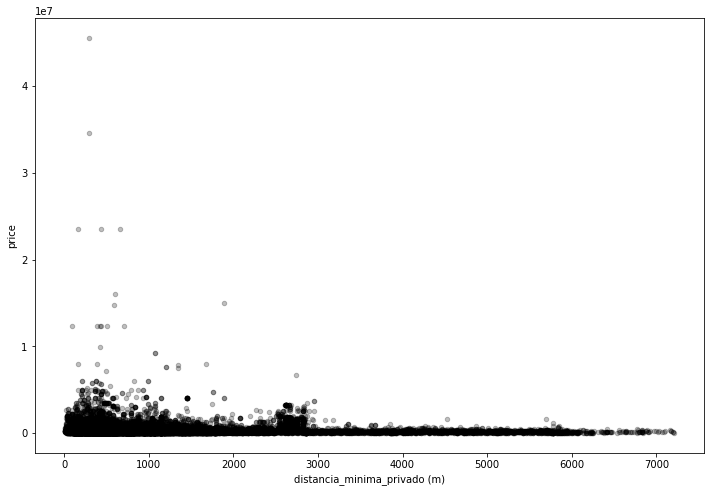

In [86]:
#Graficamos la relacion entre precio y distancia a centros de salud privada

precio_segun_distancia.plot.scatter('distancia_minima_privado (m)', 'price',alpha=0.25, figsize=(12,8),color=(0,0,0))
